In [43]:
import pandas as pd
import numpy as np

In [44]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


In [45]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [46]:
survivors = df["Survived"].value_counts()[1]
print(f"Number of survivors: {survivors}")

Number of survivors: 342


## mean age

In [47]:
#avg age based on pclass
round(df.groupby("Pclass")["Age"].mean())

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [48]:
a = round(df.groupby("Pclass")["Age"].mean())

for index,b in enumerate(a):
    print(f"Pclass: {index+1}, avg age: {b}")

Pclass: 1, avg age: 38.0
Pclass: 2, avg age: 30.0
Pclass: 3, avg age: 25.0


## survived

In [49]:
survival_by_sex = df.groupby("Sex")["Survived"].mean().round(3)
print(survival_by_sex)

Sex
female    0.742
male      0.189
Name: Survived, dtype: float64


In [50]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [51]:
df.groupby("Sex")["Survived"].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [52]:
pct_male_survivors = df[(df["Sex"] == "male") & df["Survived"] == 1].shape[0] / df[df["Sex"] == "male"].shape[0]
pct_female_survivors = df[(df["Sex"] == "female") & df["Survived"] == 1].shape[0] / df[df["Sex"] == "female"].shape[0]

In [53]:
print(f"Survivors pct:\nMale: {round(pct_male_survivors,3)}\nFemale: {round(pct_female_survivors,3)}")

Survivors pct:
Male: 0.189
Female: 0.742


### feature engineering

In [54]:
#SibSp	Parch
df["FamilySize"] = df["SibSp"] + df["Parch"]


In [55]:
df["IsAlone"] = df["FamilySize"].apply(lambda x: 1 if x == 0 else 0)

In [56]:
def get_title(row):
    if "Mr." in row:
        return "Mr."
    elif "Mrs." in row:
        return "Mrs."
    elif "Miss." in row:
        return "Miss."
    elif "Ms." in row:
        return "Ms."
    else:
        return None

In [57]:
df["Title"] = df["Name"].apply(get_title)

In [58]:
df["Title"].value_counts()

Title
Mr.      517
Miss.    182
Mrs.     125
Ms.        1
Name: count, dtype: int64

In [59]:
df["Title"] = df["Name"].str.extract(r',\s*([^\.]+)\.', expand=False)


In [60]:
df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [61]:
df["Title"] = df["Title"].replace([
    'Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df["Title"] = df["Title"].replace('Mlle', 'Miss')
df["Title"] = df["Title"].replace('Ms', 'Miss')
df["Title"] = df["Title"].replace('Mme', 'Mrs')


In [62]:
df["Title"].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

### Data Preparation

In [63]:
# median_age_men = df[df["Sex"] == 'male']["Age"].median()
# median_age_female = df[df["Sex"] == 'female']["Age"].median()

In [64]:
df["Age"] = df["Age"].fillna(df.groupby("Sex")["Age"].transform("median"))


In [65]:
if df["Age"].isna().sum() != 0:
    print('Missing Age')
else:
    print("Age cleaning completed")

Age cleaning completed


In [66]:
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

In [67]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilySize', 'IsAlone', 'Title', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [68]:
#Columns to stay: Survived, Pclass, Sex, Age, Fare, IsAlone
df = df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch',
       'Ticket', 'Cabin', 'FamilySize', 'Title',])

In [69]:
df.head()

,Survived,Pclass,Age,Fare,IsAlone,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,0,True,False,True
1,1,1,38.0,71.2833,0,False,False,False
2,1,3,26.0,7.9250,1,False,False,True
3,1,1,35.0,53.1000,0,False,False,True
4,0,3,35.0,8.0500,1,True,False,True


### Model Training

In [70]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)



In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

model_lr = LogisticRegression(max_iter=2000)
model_RF = RandomForestClassifier()





#### LR

In [85]:
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_pred=y_pred_lr, y_true=y_test)
lr_class_report = classification_report(y_pred=y_pred_lr, y_true=y_test)
print(lr_class_report)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<Axes: >

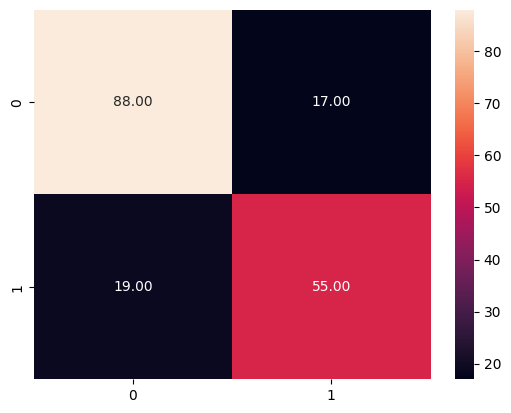

In [82]:
import seaborn as sns

sns.heatmap(lr_conf_matrix, annot=True, fmt = ".2f")

#### RF

In [87]:
model_RF.fit(X_train, y_train)
y_pred_rf = model_RF.predict(X_test)
rf_conf_matrix = confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
rf_class_report = classification_report(y_pred=y_pred_rf, y_true=y_test)
print(rf_class_report)

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



<Axes: >

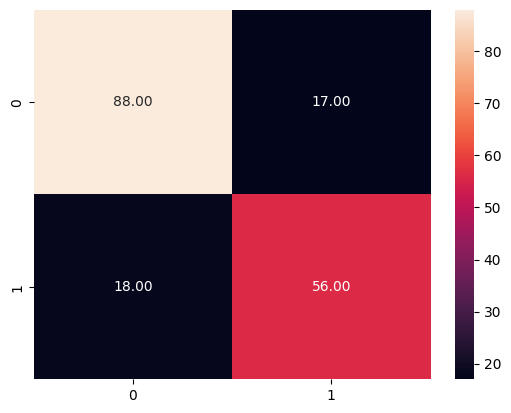

In [88]:

sns.heatmap(rf_conf_matrix, annot=True, fmt = ".2f")